# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

#### Цель исследования

1. Изучить данные и рассмотреть зависимости между ними.
2. Установить, какие факторы влияют на стоимость квартир.

##### Ход исследования

Данные о недвижимости получены из датасета '/datasets/real_estate_data.csv', о качестве данных в котором нет информации, поэтому я сначала проведу его предобработку и исправлю имеющиеся ошибки, а так же, по возможности, исправлю пропуски, если они есть, создам необходимые столбцы, а потом уже перейду к анализу.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

#### Посмотрим основную информацию по датасету:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### И выведем на экран первые 10 строк:

In [4]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


На данном этапе, можно предположить:
 Квартиры без фото продаются дольше.
 Быстрее всего продаются однокомнатные квартиры.
 Наличие балкона при равной площади квартир и равной стоимости ускоряет продажу.
 Чем больше площадь квартиры, тем дольше она находится на сайте объявлений.
 

#### Посмотрим названия столбцов и переименуем в случае необходимости:

In [5]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Исправлений не требуется, можно оставить названия столбцов в таком виде.

#### Посмотрим на распределение данных в столбцах, для этого построим гистограммы по каждому столбцу:

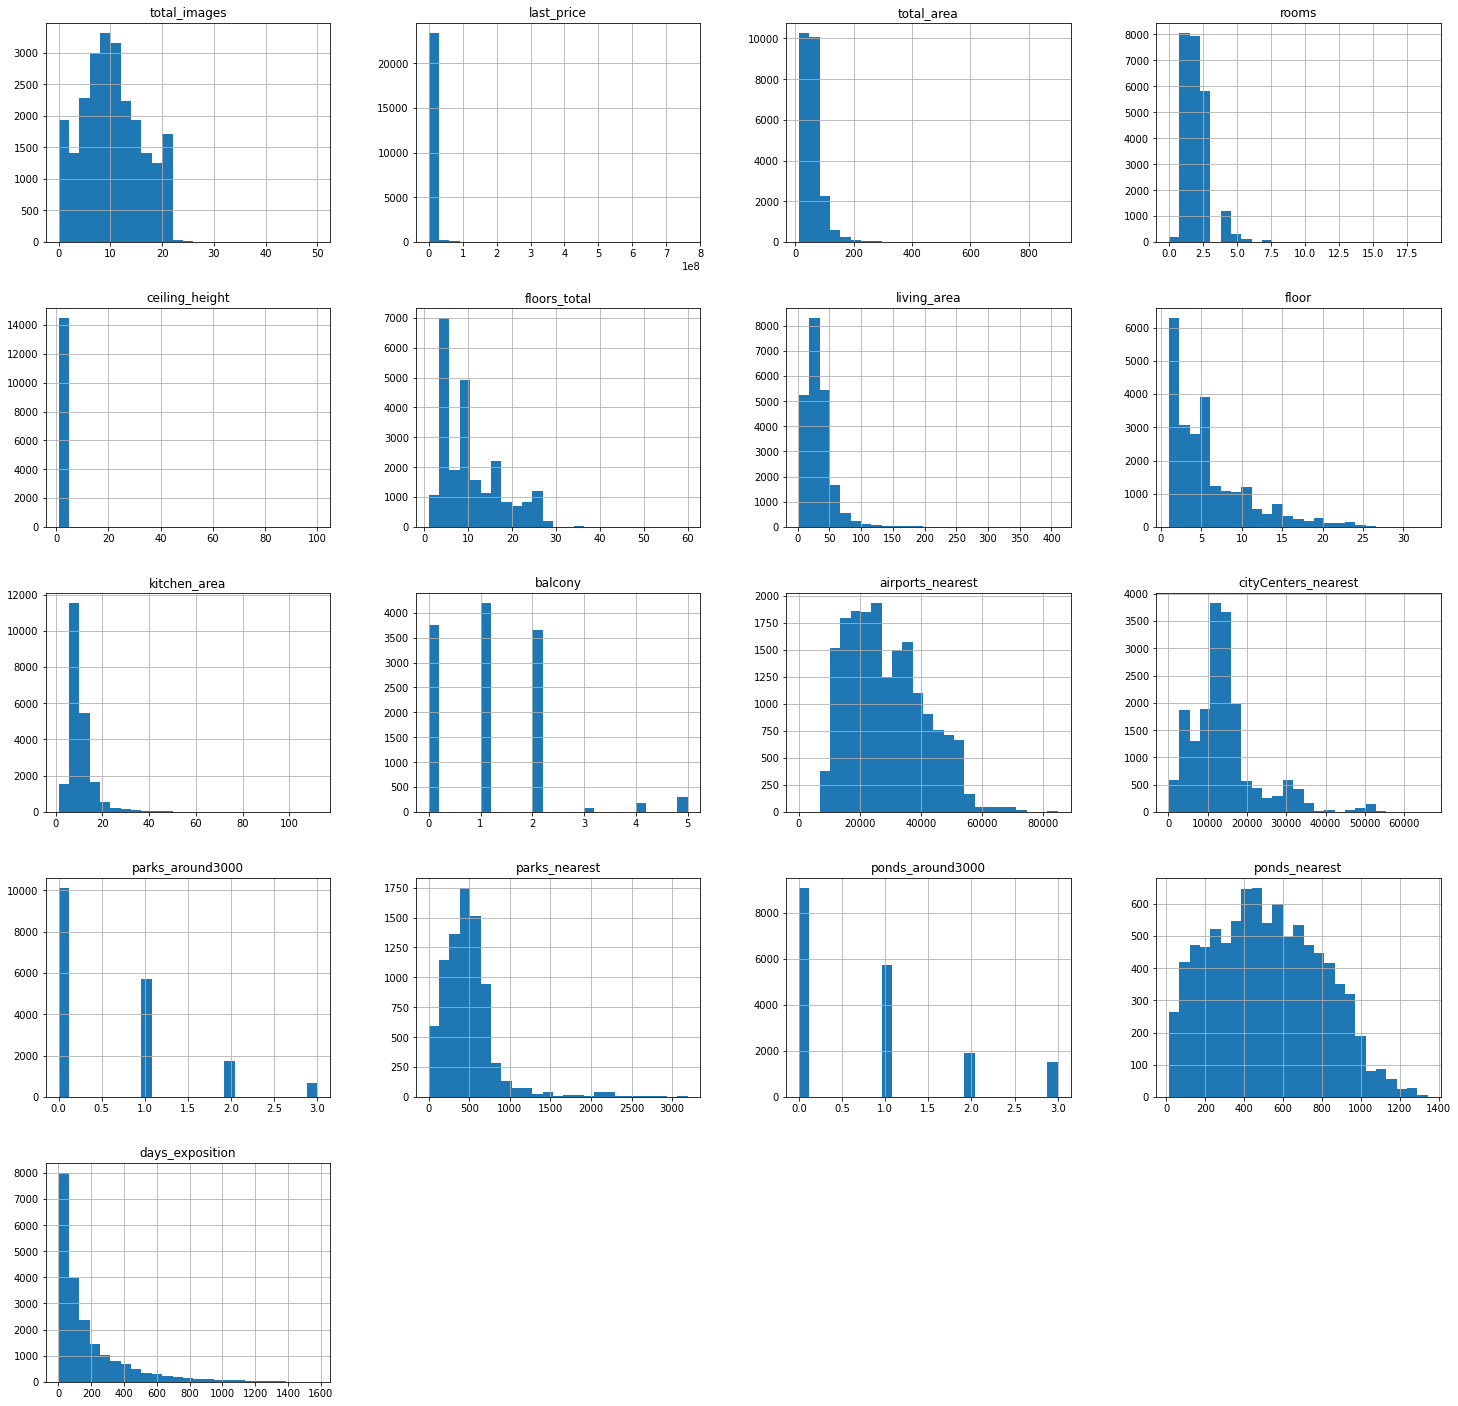

In [6]:
df.hist(bins=25, figsize=(25, 25))
plt.show()

У меня нет предупреждений ни здесь, ни далее, но я добавила это выше. Библиотека у меня импортирована в первом пункте

#### И информацию по колонкам:

In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6541548.77,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10887013.27,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800000.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


*Слишком большими значениями стандартного отклонения кажутся данные по следующим столбцам: last_price, parks_around3000, ponds_around3000, days_exposition. Они превышают медианные значения, а максимальные значения лежат на большом отдалении от них. Возможно, это связано с выбросами, но в столбцах parks_around3000 и ponds_around3000 это может быть связано с отдаленностью квартиры от водоемов и парков. В days_exposition - с действительно долгими продажами, а в last_price с дорогими объектами недвижимости.
Подозрительно длинный "хвост" на гистограмме столбца kitchen_area и слишком большое значение его максимального значения-похоже на выброс (или на ошибку в заполнении). Как правило, площадь кухни не превышает 35% общей площади помещения. Проанализирум эти значения позже.

Хвосты в колонках airports_nearest и cityCenters_nearest выглядят вполне разумно с учетом размера Ленинградской области 500х320 км по точкам наибольшей протяженности.

Крайне подозрительно (и требует дальшейшего анализа) выглядят значения в столбце ceiling_height. Высота потолков вряд ли может быть 100 м. Минимальное значение 1 м так же не реально.*

#### Рассмотрим подробнее данные и гистограмму по столбцу 'last_price':

In [8]:
df['last_price'].describe()

count       23699.00
mean      6541548.77
std      10887013.27
min         12190.00
25%       3400000.00
50%       4650000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

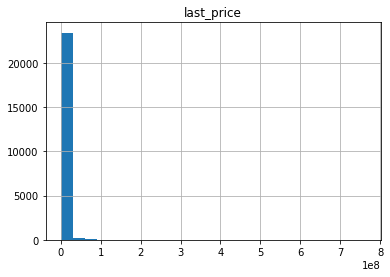

In [9]:
df.hist('last_price', bins=25)

Видно, что максимальное значение стоимости квартиры на 2 порядка выше медианного. Такое может произойти, когда продавец ставит лишние знаки (рубли/копейки). Либо, эти квартиры, действительно хороши и стоимость их реальна и оправдана. Отметим пока эти значения и будем исследовать их дальше. Посторим еще одну гистограмму со стоимостью квартир в пределах порядка седней стоимости.

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

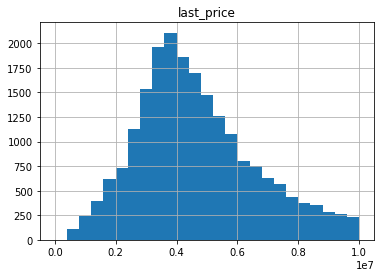

In [10]:
df.hist('last_price', bins=25, range=(0, 9999999))

Так распределение выглядит нормальным. Очевидно, что значения от среднего до максимально-это довольно длинный хвост.

### Предобработка данных

####  Проверим, в каких столбцах и сколько значений отсутствует:

In [11]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски присутствуют в столбцах:
ceiling_height           высота потолков
floors_total             количество этажей в доме
living_area              жилая площадь в квадратных метрах
is_apartment             апартаменты (булев тип)
kitchen_area             площадь кухни в квадратных метрах
balcony                  число балконов
locality_name            название населенного пункта
airports_nearest         расстояние до ближайшего аэропорта
cityCenters_nearest      расстояние до центра города
parks_around3000         парки в радиусе 3 км
parks_nearest            расстояние до ближайшего парка в м
ponds_around3000         водоемы в радиусе 3 км
ponds_nearest            расстояние до ближайшего водоема в м
days_exposition          сколько дней было размещено объявление (от публикации до снятия)

В общей сложности, в таблице 23699 строк данных. 

Столбец 'is_apartment' хранит булево значение, поэтому отсутствие значение в нем может говорить, что квартира не является апартаментами и отсутствующие значения можно заменить на 0.

В столбце 'balcony' отсутствующие значения, скорее всего, говорят об отсутствии балконов в данных объектах недвижимости и пропуски можно заменить на 0.

Отсутствующие значения в столбцах 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', возможно, можно будет заменить средними значениями по населенным пунктам - требуется изучить данные.

В около 13% строк отсутствуют значения в столбце 'days_exposition', это может быть ошибкой внесения данных, было бы хорошо запросить их и остальные невнесенные в таблицу значения.

##### Проверим, есть ли пропуски во всех этих строках. 
Выберем столбцы с минимальным количеством пропущенных значений и выведем на экран строки, в которых пропущены все эти значения:

In [12]:
df[(df['locality_name'].isna() == True) & (df['floors_total'].isna() == True)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8986,10,4850000.00,103.10,2018-07-10T00:00:00,3,NaN,NaN,68.10,4,NaN,...,16.70,NaN,NaN,19659.00,31813.00,0.00,NaN,0.00,NaN,28.00


Пересечений по всем строкам не имеется. Хотя бы часть данных в строках датафрейма присутствует. Удаление целых строк, на данный момент, не целесообразно.

#### Заменим пропущенные значения в столбце 'is_apartment' на False:

In [13]:
df['is_apartment'] = df['is_apartment'].fillna(False)

#### Работа с пропусками
##### Заменим пропущенные значения в столбце 'balcony' на 0:

In [14]:
df[df['balcony'].isna() == True].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,False,...,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,False,...,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,False,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,False,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
10,5,5050000.00,39.60,2017-11-16T00:00:00,1,2.67,12.00,20.30,3,False,...,8.50,NaN,Санкт-Петербург,38357.00,13878.00,1.00,310.00,2.00,553.00,137.00


In [15]:
df['balcony'] = df['balcony'].fillna(0)

##### Обработка пропущенных значений в столбце 'floors_total' 
Пропущеннные значения в столбце 'floors_total' можно заменить на медианное по этому столбцу, что бы не терять строки датасета. Таких строк всего 86.

In [16]:
try:
    if df[df['floor']] < df['floors_total'].median():
        df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median())
except: 
    df['floors_total'] = df['floors_total'].fillna(df['floor'] + 1)


Если количество этажей в доме не превышает медианное значение, пропуск заполнили медианой, в остальных случаях заменили номером этажа квартиры + 1, что бы не исказить данные по последним этажам.

##### Обработка пропущенных значений в столбце 'living_area'
В 1903 строках отсутствуют значения в столбце 'living_area' - это общая площадь продаваемой недвижимости. Выделим отдельно эти строки и проанализируем их:

In [17]:
df[df['living_area'].isna() == True].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,False,...,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,False,...,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
30,12,2200000.00,32.80,2018-02-19T00:00:00,1,NaN,9.00,NaN,2,False,...,NaN,0.00,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.00
37,10,1990000.00,45.80,2017-10-28T00:00:00,2,2.50,5.00,NaN,1,False,...,NaN,0.00,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.00
44,13,5350000.00,40.00,2018-11-18T00:00:00,1,NaN,22.00,NaN,3,False,...,NaN,1.00,Санкт-Петербург,30471.00,11603.00,1.00,620.00,1.00,1152.00,NaN


*Как правило, жилая площадь коррелируется с общей площадью квартир и с количеством в ней комнат. Заменим пропущенные значения в данном столбце на медианные значения по группам. Прооверим, что средние и медианные не отличаются сильно.*

**Построим сводную таблицу зависимости количества комнат, площади квартиры и жилой площади.**

In [18]:
df.pivot_table(index='rooms', values=['total_area', 'living_area'])

,living_area,total_area
rooms,,
0,18.87,29.28
1,17.89,37.64
2,31.74,55.86
3,47.39,77.76
4,66.98,107.61
5,100.01,161.47
6,130.98,201.54
7,163.56,265.33
8,168.68,259.23


**Создадим такую же сводную таблицу, но с медианными значениями.**

In [19]:
df.pivot_table(index='rooms', values=['total_area', 'living_area'], aggfunc='median')

,living_area,total_area
rooms,,
0,18.00,26.05
1,17.60,36.56
2,30.50,53.00
3,45.00,73.00
4,63.60,99.30
5,91.78,146.45
6,123.90,184.30
7,145.00,214.00
8,161.00,235.70


**Заполним пропущенные значения в столбце 'living_area' медианными значениями по каждому количеству комнат:**

In [20]:
for d in df['rooms'].unique():
    df.loc[(df['rooms'] == d) & (df['living_area'].isna()), 'living_area'] = \
    df.loc[(df['rooms'] == d), 'living_area'].median()

####   Обработка пропусков в 'kitchen_area'
Аналогично можно поступить со значениями в столбце 'kitchen_area'. 
**Посмотрим на средние и медианные значения площади кухни по количеству комнат в квартире:**

In [21]:
df.pivot_table(index='rooms', values='kitchen_area')

,kitchen_area
rooms,
1,9.55
2,9.98
3,11.31
4,13.66
5,18.37
6,21.05
7,22.00
8,24.87
9,25.07


In [22]:
df.pivot_table(index='rooms', values=['kitchen_area', 'total_area'], aggfunc='median')

,kitchen_area,total_area
rooms,,
0,NaN,26.05
1,9.04,36.56
2,8.80,53.00
3,9.50,73.00
4,11.10,99.30
5,15.10,146.45
6,19.50,184.30
7,20.00,214.00
8,25.00,235.70


Выглядят подозрительно значения площади кухни для квартир, имеющих более 8 комнат. Ожидалось, что с ростом числа комнат, площадь кухни будет расти. Но средние значения мало отличаются от медианных, поэтому заполним пропуски в столбце 'kitchen_area' медианными значениями по каждому количеству комнат:

In [23]:
for d in df['rooms'].unique():
    df.loc[(df['rooms'] == d) & (df['kitchen_area'].isna()), 'kitchen_area'] = \
    df.loc[(df['rooms'] == d), 'kitchen_area'].median()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


В квартирах-студиях (с числом комнат 0) отсутствуют отдельные кухни, поэтому пропуски в этих ячейках заменим на 0. 
** Выведем на экран оставшиеся в датасете строки с пропущенными значениями в столбце 'kitchen_area':**

In [24]:
df[df['kitchen_area'].isna() == True].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.00,27.00,2017-03-30T00:00:00,0,NaN,24.00,15.50,2,False,...,NaN,2.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.00
349,4,2320000.00,25.00,2017-09-27T00:00:00,0,NaN,14.00,17.00,1,False,...,NaN,0.00,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.00
440,8,2480000.00,27.11,2018-03-12T00:00:00,0,NaN,17.00,24.75,4,False,...,NaN,2.00,Санкт-Петербург,38171.00,15015.00,0.00,NaN,2.00,982.00,64.00
508,0,3375000.00,34.40,2017-03-28T00:00:00,0,NaN,26.00,24.30,19,False,...,NaN,1.00,посёлок Парголово,53115.00,19292.00,0.00,NaN,1.00,593.00,430.00
608,2,1850000.00,25.00,2019-02-20T00:00:00,0,NaN,10.00,18.00,7,False,...,NaN,0.00,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.00


**Все строки содержат квартиры-студии, заменяем пропуски 0:**

In [25]:
df['kitchen_area'] = df['kitchen_area'].fillna(0)

#### Обработка пропусков в столбце 'locality_name'
Посмотрим на строки с пропущенными значениями в столбце 'locality_name'. Таких строк всего 49:

In [26]:
df[df['locality_name'].isna() == True].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.00,81.70,2016-04-15T00:00:00,3,3.55,5.00,50.80,2,False,...,8.80,0.00,NaN,23478.00,4258.00,0.00,NaN,0.00,NaN,147.00
2033,6,5398000.00,80.00,2017-05-30T00:00:00,3,NaN,4.00,42.60,2,False,...,18.60,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.00
2603,20,3351765.00,42.70,2015-09-20T00:00:00,1,NaN,24.00,15.60,3,False,...,10.70,0.00,NaN,22041.00,17369.00,0.00,NaN,1.00,374.00,276.00
2632,2,5130593.00,62.40,2015-10-11T00:00:00,2,NaN,24.00,33.10,21,False,...,8.20,0.00,NaN,22041.00,17369.00,0.00,NaN,1.00,374.00,256.00
3574,10,4200000.00,46.50,2016-05-28T00:00:00,2,NaN,5.00,30.80,5,False,...,6.50,0.00,NaN,27419.00,8127.00,0.00,NaN,1.00,603.00,45.00


Очевидно, что между удаленностью от аэропорта, парков и водоемов и местоположением продаваемого жилья есть связь.
Построим сводную таблицу со средними значениями по данным столбцам, но перед этим проверим, нет неявных дубликатов.

In [27]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Видно, что одни и те же названия написаны разным образом. 
**Приведем столбец к одному виду:**

In [28]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

In [29]:
df['locality_name'] = df['locality_name'].str.replace(' городского типа', '')
df['locality_name'] = df['locality_name'].str.replace('поселок ', '')
df['locality_name'] = df['locality_name'].str.replace('деревня ', '')
df['locality_name'] = df['locality_name'].str.replace('городской ', '')

In [30]:
df.pivot_table(index='locality_name', values=['airports_nearest', 'cityCenters_nearest', 'ponds_nearest'])

,airports_nearest,cityCenters_nearest,ponds_nearest
locality_name,,,
Александровская,12896.50,27468.00,711.50
Белоостров,57769.00,38868.00,320.00
Зеленогорск,73300.25,54617.58,485.89
Колпино,26375.86,32113.77,532.27
Красное Село,26595.58,30020.28,445.50
Кронштадт,67469.26,49195.73,343.41
Левашово,52693.00,25727.00,NaN
Лисий Нос,55302.33,27613.33,NaN
Ломоносов,48308.28,50739.97,550.05


Можно определить местонахождение по этим данным (зная диапазоны удаленности объектов от населенных пунктов), но 49 строк - это не большая выборка таблицы (а время для восстановления данных уйдет достаточно много) или попросить дополнить таблицу данными с точным адресом (но примем условие, что нам его все равно не дали), поэтому пропущенные данные заменим на 'Не указано'. Хотя, вероятнее всего, данные просто потерялись при перенесении данных из точного адреса. Нельзя же купить квартиру, не зная адрес.

In [31]:
df['locality_name'] = df['locality_name'].fillna('Не указано')

#### Обработка пропусков в столбце 'ceiling_height'
*Как правило, высота потолков коррелируется с общей этажностью дама. Вероятнее всего, пропущенные значения в столбце 'ceiling_height' можно заменить медианными в зависимости от общего количества этажей в доме.* 

**Построим сводную таблицу:**

In [32]:
df.pivot_table(index='floors_total', values='ceiling_height', aggfunc='median')

,ceiling_height
floors_total,
1.00,2.80
2.00,2.70
3.00,2.80
4.00,3.00
5.00,2.55
6.00,3.00
7.00,3.00
8.00,2.80
9.00,2.55


Данные в ячейках для 36-ти и 37-ми этажных домов явно занесены с ошибкой. 

**Посмотрим строки:**

In [33]:
df[(df['floors_total'] == 36) | (df['floors_total'] == 37)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5990000.00,54.00,2018-03-22T00:00:00,2,NaN,36.00,21.40,28,False,...,18.70,1.00,Санкт-Петербург,18732.00,20444.00,0.00,NaN,3.00,80.00,11.00
5807,17,8150000.00,80.00,2019-01-09T00:00:00,2,27.00,36.00,41.00,13,False,...,12.00,5.00,Санкт-Петербург,18732.00,20444.00,0.00,NaN,3.00,80.00,38.00
11079,16,9200000.00,75.00,2019-02-22T00:00:00,2,2.70,36.00,40.00,29,False,...,12.00,2.00,Санкт-Петербург,18732.00,20444.00,0.00,NaN,3.00,80.00,NaN
16934,5,4100000.00,40.00,2017-10-17T00:00:00,1,1.75,37.00,17.40,5,False,...,8.34,0.00,Санкт-Петербург,18732.00,20444.00,0.00,NaN,3.00,80.00,71.00


Значение 27.0 явно соответствует 2.7, а 1.75 - 2.75. 
** Заменим их на верные.**

In [34]:
df['ceiling_height'] = df['ceiling_height'].replace(27.00, 2.70)
df['ceiling_height'] = df['ceiling_height'].replace(1.75, 2.75)

df[(df['floors_total'] == 36) | (df['floors_total'] == 37)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5990000.00,54.00,2018-03-22T00:00:00,2,NaN,36.00,21.40,28,False,...,18.70,1.00,Санкт-Петербург,18732.00,20444.00,0.00,NaN,3.00,80.00,11.00
5807,17,8150000.00,80.00,2019-01-09T00:00:00,2,2.70,36.00,41.00,13,False,...,12.00,5.00,Санкт-Петербург,18732.00,20444.00,0.00,NaN,3.00,80.00,38.00
11079,16,9200000.00,75.00,2019-02-22T00:00:00,2,2.70,36.00,40.00,29,False,...,12.00,2.00,Санкт-Петербург,18732.00,20444.00,0.00,NaN,3.00,80.00,NaN
16934,5,4100000.00,40.00,2017-10-17T00:00:00,1,2.75,37.00,17.40,5,False,...,8.34,0.00,Санкт-Петербург,18732.00,20444.00,0.00,NaN,3.00,80.00,71.00


Принято к сведению) спасибо!

**Выведем еще раз сводную таблицу.**

In [35]:
df.pivot_table(index='floors_total', values='ceiling_height', aggfunc='median')

,ceiling_height
floors_total,
1.00,2.80
2.00,2.70
3.00,2.80
4.00,3.00
5.00,2.55
6.00,3.00
7.00,3.00
8.00,2.80
9.00,2.55


** Теперь можно заполнять пропуски в столбце медианными значениями:**

In [36]:
for d in df['floors_total'].unique():
    df.loc[(df['floors_total'] == d) & (df['ceiling_height'].isna()), 'ceiling_height'] = \
    df.loc[(df['floors_total'] == d), 'ceiling_height'].median()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


**Выведем оставшиеся пустыми строки с пропусками в столбце 'ceiling_height':**

In [37]:
df[df['ceiling_height'].isna() == True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11575,9,9900000.00,101.00,2016-04-28T00:00:00,3,NaN,33.00,53.00,32,False,...,21.00,0.00,Санкт-Петербург,18732.00,20444.00,0.00,NaN,3.00,80.00,53.00


* Заполним последнее отсутствующее значение в этом столбце медианным по всем этажностям, просто потому что можем)*

In [38]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

**Проверим, сколько пропусков осталось и где:**

In [39]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Обработка пропусков в столбцах 'cityCenters_nearest', 'parks_around3000' и 'ponds_around3000'
Чувствуется закономерность в пропусках в столбцах 'cityCenters_nearest', 'parks_around3000' и 'ponds_around3000'. **Посмотрим количество строк, в которых одновременно пропущены все эти значения и выведем первые 15 из них:**

In [40]:
df[(df['cityCenters_nearest'].isna() == True) & (df['parks_around3000'].isna() == True) & (df['ponds_around3000'].isna() == True)].head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,2.65,12.00,14.40,5,False,...,9.10,0.00,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,2.70,27.00,15.43,26,False,...,8.81,0.00,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
12,10,3890000.00,54.00,2016-06-30T00:00:00,2,2.55,5.00,30.00,5,False,...,9.00,0.00,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.00
22,20,5000000.00,58.00,2017-04-24T00:00:00,2,2.75,25.00,30.00,15,False,...,11.00,2.00,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.00
30,12,2200000.00,32.80,2018-02-19T00:00:00,1,2.55,9.00,17.60,2,False,...,9.04,0.00,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.00
37,10,1990000.00,45.80,2017-10-28T00:00:00,2,2.50,5.00,30.50,1,False,...,8.80,0.00,Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.00
38,10,3150000.00,40.00,2018-03-29T00:00:00,1,2.75,18.00,16.30,9,False,...,11.60,0.00,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.00
47,17,3600000.00,56.10,2018-10-18T00:00:00,3,3.00,4.00,42.50,3,False,...,5.70,1.00,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.00
60,3,2740000.00,35.00,2018-01-01T00:00:00,1,2.65,12.00,17.60,8,False,...,9.04,0.00,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.00
62,0,4800000.00,78.60,2017-09-17T00:00:00,3,2.80,9.00,48.80,5,False,...,11.90,2.00,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.00


Складывается ощущение, что все эти пропуски лежат вне СпБ. Проверим:

In [41]:
df[(df['cityCenters_nearest'].isna() == True) & (df['parks_around3000'].isna() == True) & (df['ponds_around3000'].isna() == True) & (df['locality_name'] == 'Санкт-Петербург')].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
81,9,10949000.00,68.00,2018-12-27T00:00:00,1,2.60,10.00,17.60,6,False,...,9.04,0.00,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593,20,4200000.00,38.30,2019-04-16T00:00:00,1,2.60,16.00,19.80,10,False,...,10.10,2.00,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
604,11,9899000.00,101.00,2018-12-12T00:00:00,3,3.00,5.00,62.00,3,False,...,15.00,0.00,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
742,7,37000000.00,161.00,2016-05-22T00:00:00,3,2.55,9.00,84.00,8,False,...,9.50,0.00,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,402.00
795,19,7100000.00,59.60,2019-02-13T00:00:00,2,3.40,5.00,36.60,2,False,...,12.50,0.00,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*На данный момент, однозначно можно сказать, что отсутствие данных по близлежащим аэропортам, паркам и водоемам совершенно не мешают людям продавать и покупать недвижимость. По СпБ таких строк всего 61, а остальные-по Ленинградской области. Эти данные могли пропустить при заполнении объявлений, тк просто не хотели их заполнять (что, скорее всего, произошло в СпБ). В области же, скорее всего, слишком большие расстояния для тех объектов, в которых данные не заполнены.

В случае, если бы сейчас пришлось бы обучать модель, то я бы тоже оставила столбцы не заполненными и попробовала бы обучать ее на имеющихся данных. Если люди считают эту информацию не очень важной, то что на это 'скажет' машина?*

*Так же я намеренно оставляю пропуски в столбце 'days_exposition'. На мой взгляд, эти пропуски указывают на то, что квартиры на момент сбора данных еще не проданы. А в случае, если они проданы, а мы решим заполнить пропуски искусственно, это не отразит реальной скорости продажи и может навредить статистике и, в дальнейшем, обучению модели.*

** Построим еще раз гистограммы по всем значениям и посмотрим, присутствуют ли сильные изменения:**

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

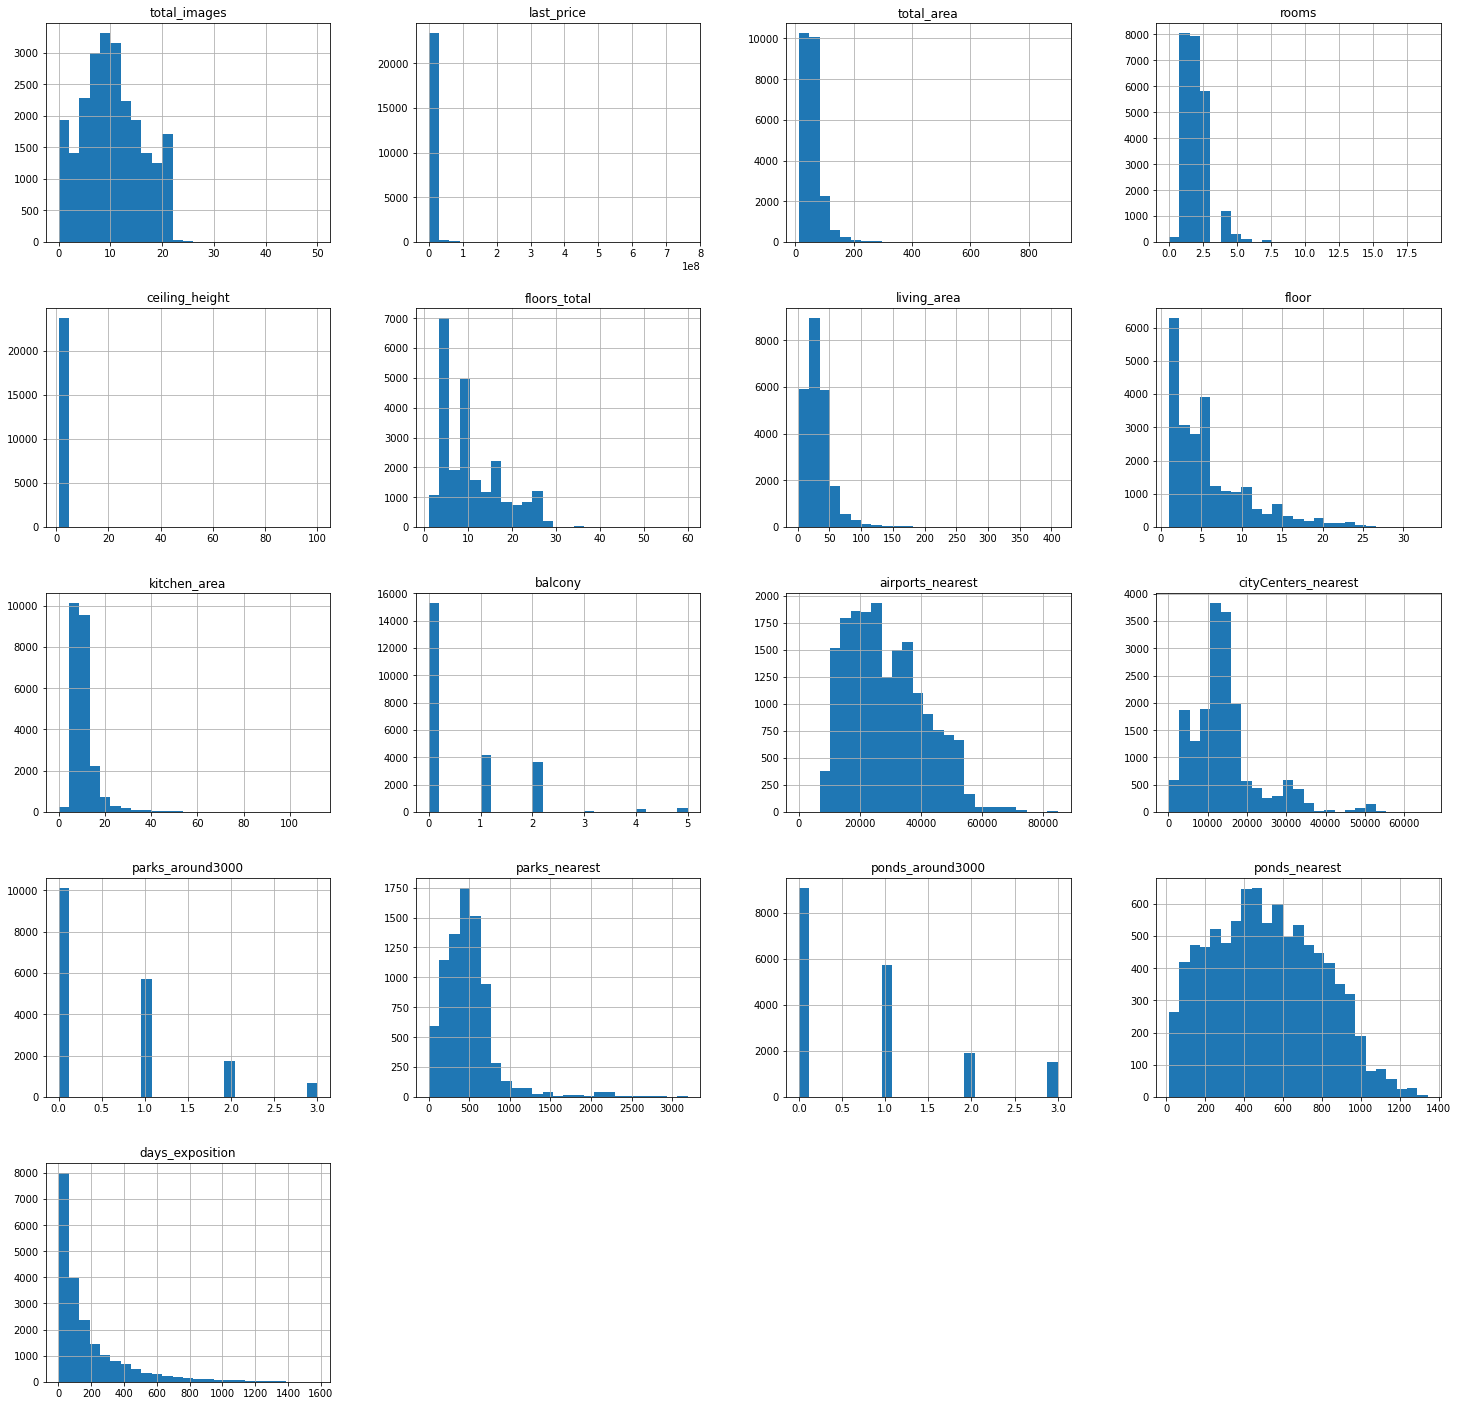

In [42]:
df.hist(bins=25, figsize=(25, 25))

In [43]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,23699.00,23699.00,23699.00,23699.00,23699.00,23699.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6541548.77,60.35,2.07,2.73,10.68,34.32,5.89,10.38,0.59,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10887013.27,35.65,1.08,0.89,6.60,21.70,4.89,5.72,0.96,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,0.00,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.55,5.00,18.40,2.00,7.20,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.30,4.00,9.04,0.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800000.00,69.90,3.00,2.75,16.00,42.70,8.00,11.50,1.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


*В среднем, квартиры в СпБ и Ленинградской области продаются за 180 дней (почти полгода), половина из них-за 95 дней. Самая быстрая скорость продажи - 1 день, а некоторорые ждут заключения сделки 1580 дней (больше 4 лет), но они, видимо, верят в поговорку, согласно которой на любой товар есть свой купец)* Правда, есть здесь подозрения, что квартиры эти и не продают, а только риелторы звонки принимают.

*Быстрыми продажами можно назвать продажи в срок до 45 дней влючительно. В этот срок продается 25% квартир.*

### Предобработка данных

#### Проверим, встречаются ли в датасете совпадающие строки:

In [44]:
df[df.duplicated()].head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


В прошлой части мы выяснили, что большие отклонения от среднего есть в столбцах с ценой и высотой потолков. Эти значения крайне похожи на выбросы. Проанализируем их и постараемся избавиться.

#### Поиск аномалий в стоимости квартир

Сейчас мы точно знаем, что 75% значений в столбце 'last_price' лежит в пределах 6800000.00, а 50% - 4650000.00. Выведем на экран таблицу со значениями стоимости выше 10000000.

In [47]:
df[df['last_price'] > 10000000].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,False,...,25.00,0.00,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,2.60,14.00,45.00,9,False,...,9.50,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
19,16,14200000.00,121.00,2019-01-09T00:00:00,3,2.75,16.00,76.00,8,False,...,12.00,0.00,Санкт-Петербург,38900.00,12843.00,0.00,NaN,0.00,NaN,97.00
35,6,15500000.00,149.00,2017-06-26T00:00:00,5,2.55,5.00,104.00,4,False,...,17.00,0.00,Санкт-Петербург,23670.00,3502.00,0.00,NaN,1.00,779.00,644.00
42,13,22000000.00,161.80,2015-07-08T00:00:00,4,2.80,4.00,80.90,2,False,...,17.60,5.00,Петергоф,35416.00,30605.00,2.00,47.00,1.00,907.00,987.00


Таких значений много - 2721. Посмотрим с точки зрения стоимости недвижимости за 1 м2. Сформируем новый столбец df_price_for_metr и посмотрим значения:

In [48]:
df['price_for_metr'] = df['last_price'] / df['total_area']
df['price_for_metr'].describe()

count     23699.00
mean      99421.66
std       50306.80
min         111.83
25%       76585.47
50%       95000.00
75%      114256.33
max     1907500.00
Name: price_for_metr, dtype: float64

<AxesSubplot:>

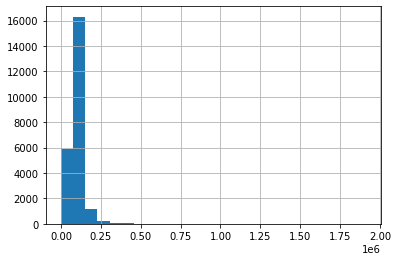

In [49]:
df['price_for_metr'].hist(bins=25)

Видно, что средняя цена за квадратный метр около 100 тысяч, а максимальная-почти 2 миллиона. Очень похоже на выброс. **Выведем на экран строки со стоимостью более 700 тысяч за квадратный метр:**

In [50]:
df[df['price_for_metr'] > 700000].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metr
1436,19,330000000.00,190.00,2018-04-04T00:00:00,3,3.50,7.00,95.00,5,False,...,0.00,Санкт-Петербург,23011.00,1197.00,3.00,519.00,3.00,285.00,233.00,1736842.11
4859,16,28000000.00,33.00,2019-04-29T00:00:00,1,3.50,5.00,17.60,2,False,...,0.00,Санкт-Петербург,23447.00,1376.00,3.00,344.00,3.00,119.00,NaN,848484.85
4996,20,124000000.00,124.50,2017-10-12T00:00:00,4,3.00,4.00,67.20,2,False,...,0.00,Санкт-Петербург,20399.00,1722.00,3.00,302.00,3.00,172.00,45.00,995983.94
6462,2,82000000.00,114.00,2015-12-17T00:00:00,3,2.55,5.00,78.50,4,False,...,0.00,Санкт-Петербург,22460.00,3400.00,2.00,218.00,3.00,69.00,651.00,719298.25
8322,20,39900000.00,55.30,2017-10-26T00:00:00,1,3.05,6.00,35.00,4,False,...,4.00,Санкт-Петербург,25685.00,2136.00,1.00,72.00,3.00,202.00,NaN,721518.99


array([[<AxesSubplot:title={'center':'price_for_metr'}>]], dtype=object)

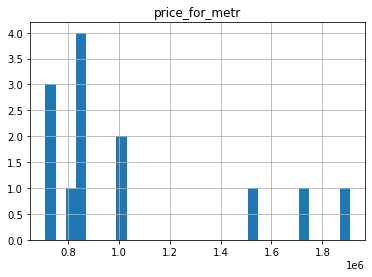

In [51]:
df[df['price_for_metr'] > 700000].hist('price_for_metr', bins = 30)

В основном, это - большие квартиры, а квартира с самой большой стоимостью за м2 имеет площадь 400 м2. Возможно, в ней тоже есть комната грязи и золотые ершики. В конце концов, кто мы такие, что бы осуждать продавцов. Все имеющиееся квартиры оставим в датасете. Очень дорогая недвижимость хоть и редко встречается, но все же встречается, продается и покупается.

**Проверим теперь дешевые квартиры:**

In [52]:
df[df['price_for_metr'] < 70000].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metr
24,8,6500000.00,97.20,2015-10-31T00:00:00,2,2.80,3.00,46.50,1,False,...,0.00,Санкт-Петербург,20052.00,2336.00,3.00,411.00,3.00,124.00,265.00,66872.43
26,6,4050000.00,60.00,2017-04-28T00:00:00,4,2.55,5.00,43.00,4,False,...,0.00,Санкт-Петербург,11580.00,10510.00,0.00,NaN,1.00,95.00,265.00,67500.00
30,12,2200000.00,32.80,2018-02-19T00:00:00,1,2.55,9.00,17.60,2,False,...,0.00,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.00,67073.17
33,8,4800000.00,73.00,2018-10-15T00:00:00,4,2.55,9.00,51.60,5,False,...,0.00,Колпино,26535.00,32321.00,0.00,NaN,0.00,NaN,92.00,65753.42
37,10,1990000.00,45.80,2017-10-28T00:00:00,2,2.50,5.00,30.50,1,False,...,0.00,Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.00,43449.78


Слишком подозрительных дешевых квартир нет. Все выглядит так, что это можно брать с собой в дальнийший анализ!

#### Посмотрим, что у нас творится с потолками или поиск аномалий в столбце 'ceiling_height'. 
По предыдущиму анализу мы выяснили, что медианные значения высоты потолков не превышают 3 м. При этом, мы знаем, что есть двухярусные квартиры с высотой потолка в пределах 5,7-6 м (2 неполных этажа). Выведем на экран те строки, в которых высота потолка выше 6 м и те, где ниже 2,4 м:

In [53]:
df[(df['ceiling_height'] > 6) | (df['ceiling_height'] < 2.4)].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metr
227,13,2200000.00,47.00,2018-01-12T00:00:00,3,2.34,5.00,45.00,1,False,...,0.00,Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,45.00,46808.51
355,17,3600000.00,55.20,2018-07-12T00:00:00,2,25.00,5.00,32.00,2,False,...,2.00,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.00,65217.39
552,11,2999000.00,33.50,2017-03-30T00:00:00,1,2.00,15.00,17.50,6,False,...,0.00,Санкт-Петербург,33972.00,11746.00,1.00,520.00,1.00,949.00,270.00,89522.39
1582,4,4100000.00,45.60,2016-01-13T00:00:00,2,2.30,9.00,28.40,8,False,...,2.00,Санкт-Петербург,49152.00,14977.00,1.00,489.00,1.00,525.00,329.00,89912.28
2572,4,2400000.00,62.00,2018-12-27T00:00:00,3,2.00,5.00,40.00,4,False,...,1.00,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38709.68


41 строка с 1-3 комнатными квартирами в обычных домах. Точно не дворцы, но и не бункеры под землей! Данные по высоте потолков просто занесены с ошибками, исправим. Заменим значения медианными:

In [54]:
df.loc[df['ceiling_height'] > 6] = df['ceiling_height'].median()
df.loc[df['ceiling_height'] < 2.4] = df['ceiling_height'].median()

In [55]:
df[(df['ceiling_height'] > 6) | (df['ceiling_height'] < 2.4)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metr


Видимых ошибок больше нет. Проверим, на всякий случай, что в наших данных нет ошибочных, в которых жилая площадь или площадь кухни больше площади квартиры.

In [56]:
df[df['living_area'] >= df['total_area']].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metr
227,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,...,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65
355,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,...,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65
552,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,...,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65
1582,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,...,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65
1595,7.00,3200000.00,62.40,2019-04-23T00:00:00,4.00,2.55,5.00,63.60,2.00,False,...,1.00,Кингисепп,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51282.05


In [57]:
df[df['kitchen_area'] > df['total_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metr


29 строк с абсолютно точно допущенными оiибками во внесении площадей. Причем, выяснить, в каком именно столбце были допущены неточности (и только ли в 1 столбце эти неточности есть) на данный момент, нельзя. Но практически все эти квартиры проданы на момент сбора информации. Кстати, почти по всем ним малое количество фото в публикации и очень низкая цена. Подозреваю проделки нечистоплотных риелторов, которые размещают объявления, а потом говорят, что именно эта квартира уже забронирована, но есть подобная дороже. Смотреть будете?)

**Удалим эти строки из датасета и не будем брать их в дальнейший анализ. Заодно и первые строки дубликатов удалятся)**

In [58]:
df = df[df['living_area'] < df['total_area']].reset_index(drop=True)

**Было бы хорошо дополнительно проанализировать квартиры, у которых не сходится суммарная площадь и те, в которых доля жилой площади превышает нормальную, но сейчас я делать этого не буду, просто выведу на экран строки.**

In [59]:
df[(df['living_area'] + df['kitchen_area']) > df['total_area']].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metr
184,7.00,2600000.00,30.20,2018-02-14T00:00:00,1.00,2.65,9.00,26.10,5.00,False,...,0.00,Санкт-Петербург,13952.00,15031.00,0.00,NaN,1.00,824.00,12.00,86092.72
236,4.00,2438033.00,28.10,2016-11-23T00:00:00,1.00,2.70,2.00,20.75,1.00,False,...,0.00,Санкт-Петербург,22041.00,17369.00,0.00,NaN,1.00,374.00,251.00,86762.74
321,6.00,2000000.00,25.00,2017-02-07T00:00:00,1.00,2.55,5.00,17.60,5.00,False,...,0.00,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,45.00,80000.00
543,9.00,4700000.00,23.80,2018-12-28T00:00:00,1.00,2.70,18.00,20.00,9.00,False,...,0.00,Санкт-Петербург,9731.00,11849.00,0.00,NaN,0.00,NaN,108.00,197478.99
544,0.00,6000001.00,25.00,2018-11-16T00:00:00,1.00,3.00,5.00,17.60,5.00,False,...,0.00,Санкт-Петербург,25169.00,3871.00,1.00,207.00,1.00,776.00,17.00,240000.04


271 строка с волшебными квартирами, общая площадь которых меньше, чем суммарная жилой и кухонной. А в них же еще нежилые помещения есть! Однозначно, квартиры из вселенной Гарри Поттера)

**Изменим тип данных в столбце 'floors_total':**

In [60]:
df['days_exposition'] = df['days_exposition'].astype('Int64', errors='ignore')

In [61]:
df['total_images'] = df['total_images'].astype('int')

In [62]:
df['balcony'] = df['balcony'].astype('int')

In [63]:
df['floors_total'] = df['floors_total'].astype('int')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23627 entries, 0 to 23626
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23627 non-null  int64  
 1   last_price            23627 non-null  float64
 2   total_area            23627 non-null  float64
 3   first_day_exposition  23627 non-null  object 
 4   rooms                 23627 non-null  float64
 5   ceiling_height        23627 non-null  float64
 6   floors_total          23627 non-null  int64  
 7   living_area           23627 non-null  float64
 8   floor                 23627 non-null  float64
 9   is_apartment          23627 non-null  object 
 10  studio                23627 non-null  object 
 11  open_plan             23627 non-null  object 
 12  kitchen_area          23627 non-null  float64
 13  balcony               23627 non-null  int64  
 14  locality_name         23627 non-null  object 
 15  airports_nearest   

В ходе работы был изучен датасет с информацией с сайта купли-продажи недвижимости. Были обнаружены пропуски в данных: ceiling_height (высота потолков), floors_total (количество этажей в доме), living_area (жилая площадь в квадратных метрах), is_apartment (апартаменты (булев тип)), kitchen_area (площадь кухни в квадратных метрах), balcony (число балконов), locality_name (название населенного пункта), airports_nearest (расстояние до ближайшего аэропорта), cityCenters_nearest (расстояние до центра города), parks_around3000 (парки в радиусе 3 км), parks_nearest (расстояние до ближайшего парка в м), ponds_around3000 (водоемы в радиусе 3 км), ponds_nearest (расстояние до ближайшего водоема в м), days_exposition (сколько дней было размещено объявление (от публикации до снятия)).

Пропуски в столбце ceiling_height были заполнены медианными по количеству этажей в доме, cтолбец 'is_apartment' хранит булево значение, поэтому отсутствие значения в нем заполнены 0, в столбце 'balcony' отсутствующие значения, скорее всего, говорят об отсутствии балконов в данных объектах недвижимости и пропуски были заменены на 0, пропущеннные значения в столбце 'floors_total'были заполненны медианными по этому столбцу для значений, где общая этажность выше медианной, жилая площадь коррелируется с общей площадью квартир и с количеством в ней комнат, поэтому пропущенные значения в столбце 'living_area' заменили на медианные значения по группам. Аналогично поступили со значениями в столбце 'kitchen_area'.Пропущенные данные в столбце locality_name заменим на 'Не указано'. Пропущенные значения в столбце 'ceiling_height' заменили медианными в зависимости от общего количества этажей в доме.
В столбцах 'days_exposition', airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000 и ponds_nearest были оставлены пропуски. На мой взгляд, заполнение пропусков искусственно не отразит реальной статистике и, в дальнейшем, помешает обучению модели.

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавим в таблицу столбцы с днем недели, месяцом и годом публикации:

In [65]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['day'] = df['first_day_exposition'].dt.weekday   # день недели
df['month'] = df['first_day_exposition'].dt.month   # месяц
df['year'] = df['first_day_exposition'].dt.year     # год

#### Категоризируем этажи: первый/последний/другой.

In [66]:
def make_type_floor(df):
    if df['floor'] == 1:
        return 'первый'
    if df['floor'] == df['floors_total']:
        return 'последний'
    return 'другой'

df['type_floor'] = df.apply(make_type_floor, axis=1)

In [67]:
df['cityCenters'] = round(df['cityCenters_nearest'] / 1000)

In [68]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metr,day,month,year,type_floor,cityCenters
0,20,13000000.00,108.00,2019-03-07,3.00,2.70,16,51.00,8.00,False,...,482.00,2.00,755.00,NaN,120370.37,3,3,2019,другой,16.00
1,7,3350000.00,40.40,2018-12-04,1.00,2.75,11,18.60,1.00,False,...,NaN,0.00,NaN,81.00,82920.79,1,12,2018,первый,19.00
2,10,5196000.00,56.00,2015-08-20,2.00,2.55,5,34.30,4.00,False,...,90.00,2.00,574.00,558.00,92785.71,3,8,2015,другой,14.00
3,0,64900000.00,159.00,2015-07-24,3.00,2.60,14,45.00,9.00,False,...,84.00,3.00,234.00,424.00,408176.10,4,7,2015,другой,7.00
4,2,10000000.00,100.00,2018-06-19,2.00,3.03,14,32.00,13.00,False,...,112.00,1.00,48.00,121.00,100000.00,1,6,2018,другой,8.00


Мы предобработали данные и добавили нужные столбцы. Можно переходить к рассчетам.

### Проведите исследовательский анализ данных

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>],
       [<AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>,
        <AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>],
       [<AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_exposition'}

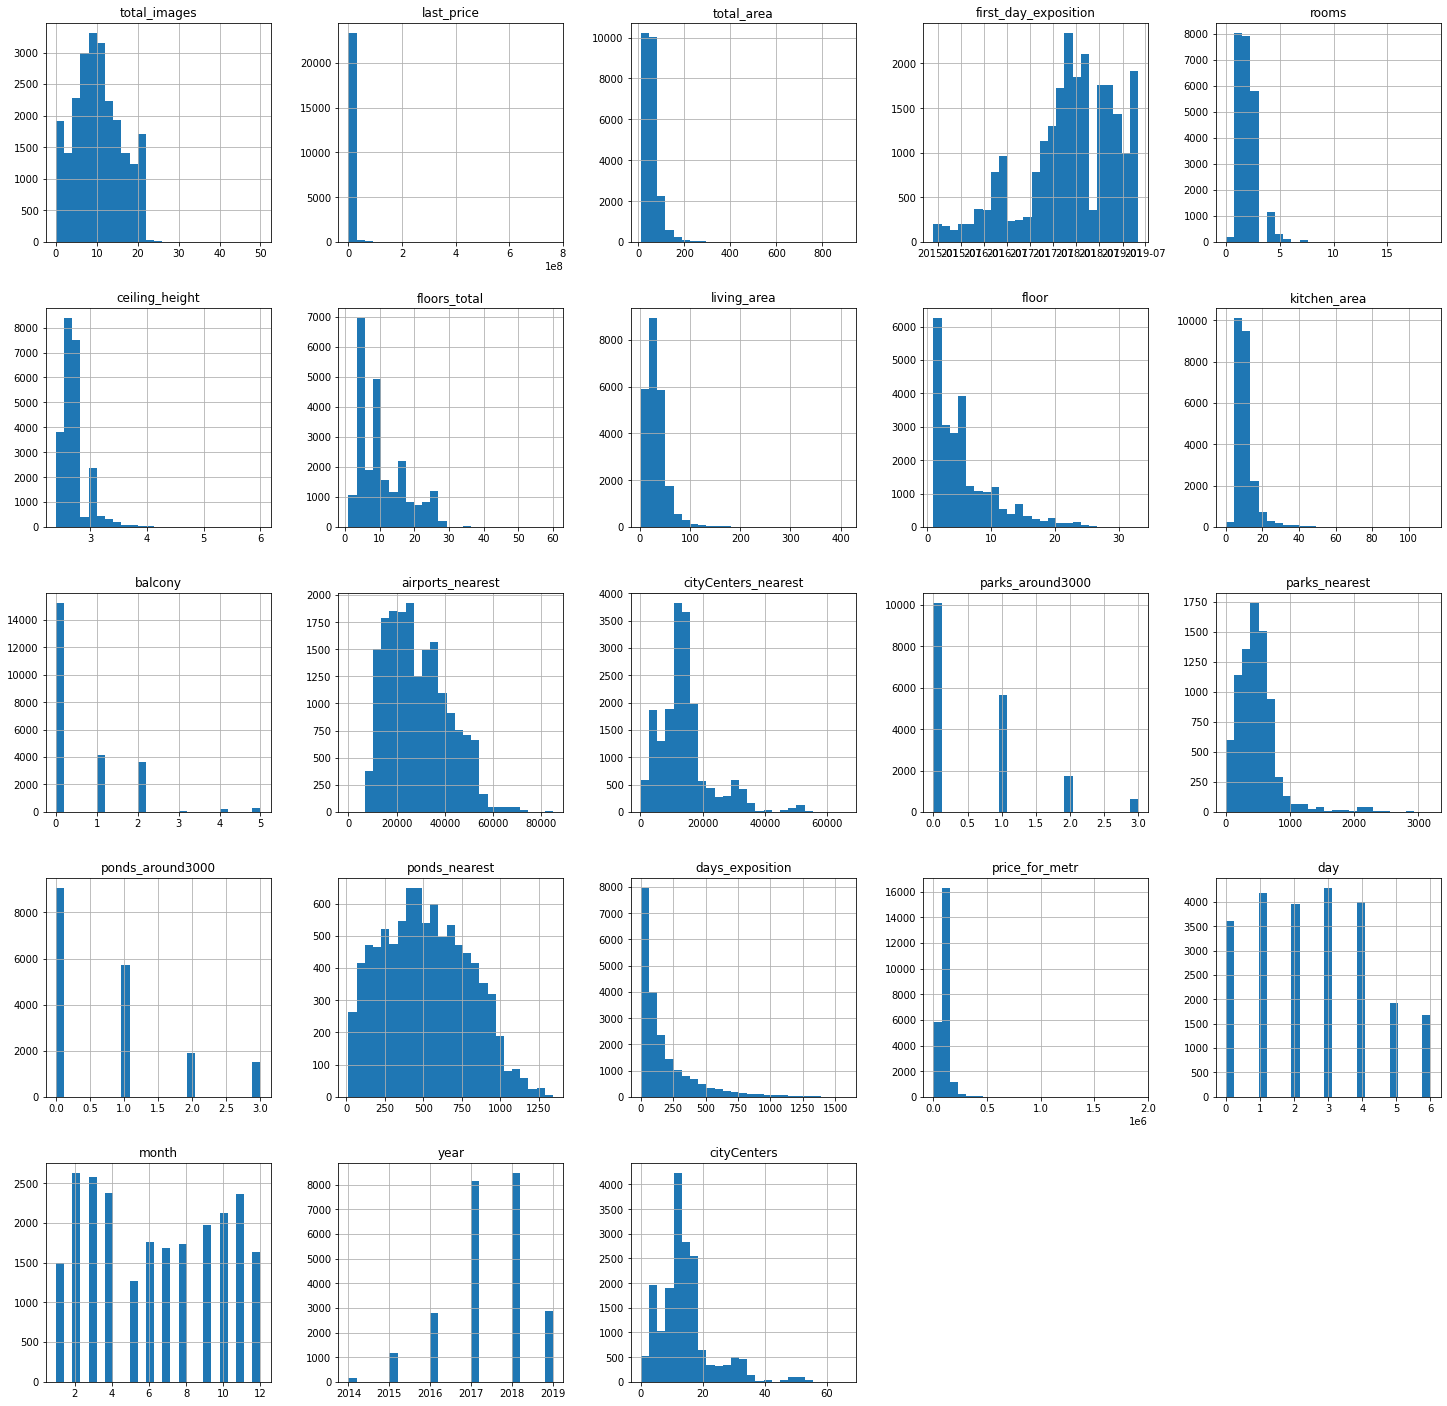

In [69]:
df.hist(bins=25, figsize=(25, 25))

Рассмотрим каждый график по отдельности, что бы кода было больше и не приходилось ужасно сложным двойным кликом увеличивать графики для их просмотра:

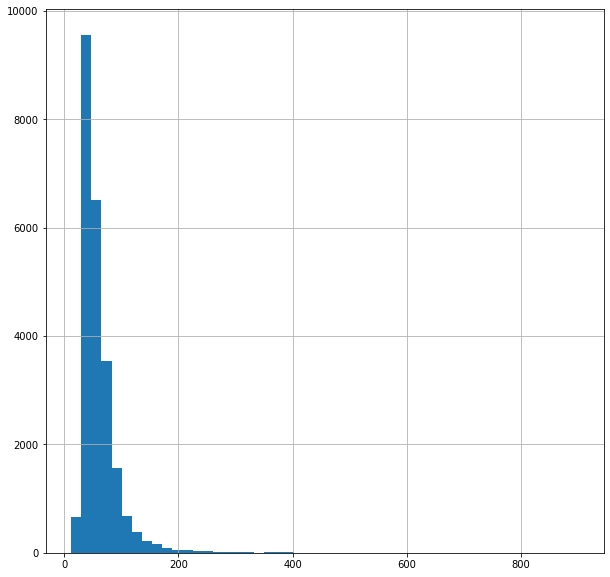

<AxesSubplot:>

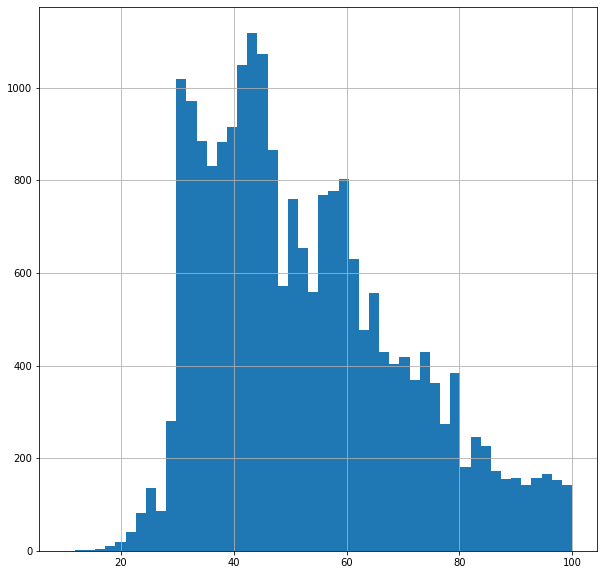

In [70]:
df['total_area'].hist(bins=50, figsize=(10, 10))
plt.show()
df['total_area'].hist(bins=50, figsize=(10, 10), range=(10, 100))

На гистограмме заметны пики для пощадей квартир-студий (до 30м2) и довольно крупние пики для однокомнатных, двухкомнатных и трехкомнатных квартир стандарной планировки. Доля квартир с большой площадью уходит в хвост.

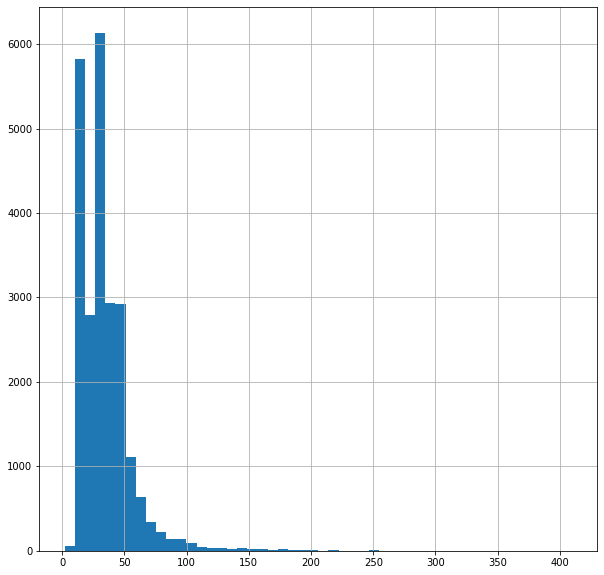

<AxesSubplot:>

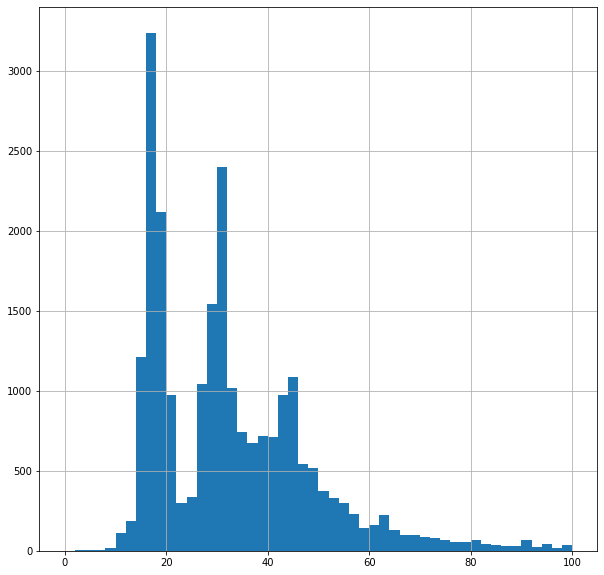

In [71]:
df['living_area'].hist(bins=50, figsize=(10, 10))
plt.show()
df['living_area'].hist(bins=50, figsize=(10, 10), range=(0, 100))

Аналогичное происходит и на гистограмме с жилой площадью. Три самых крупных пика - однокомнатные/студии, двухкомнатные и трехкомнатные квартиры.

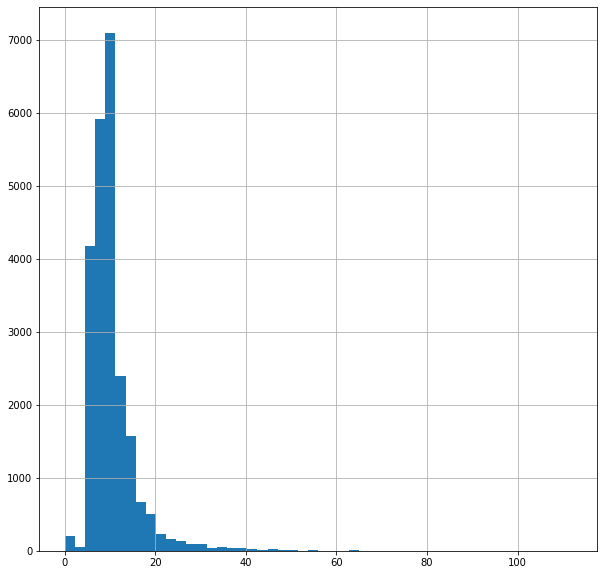

<AxesSubplot:>

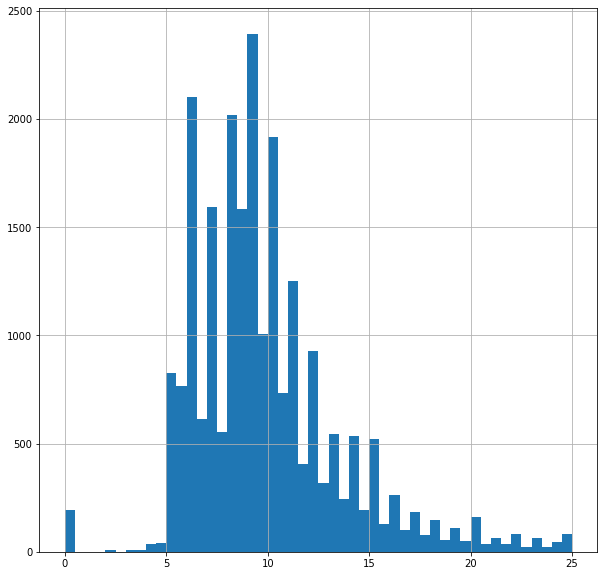

In [72]:
df['kitchen_area'].hist(bins=50, figsize=(10, 10))
plt.show()
df['kitchen_area'].hist(bins=50, figsize=(10, 10), range=(0, 25))

А вот кухни, как правило, во всех квартирах оказались типовыми. И даже в самых больших квартирах кухни редко более 20 м2.

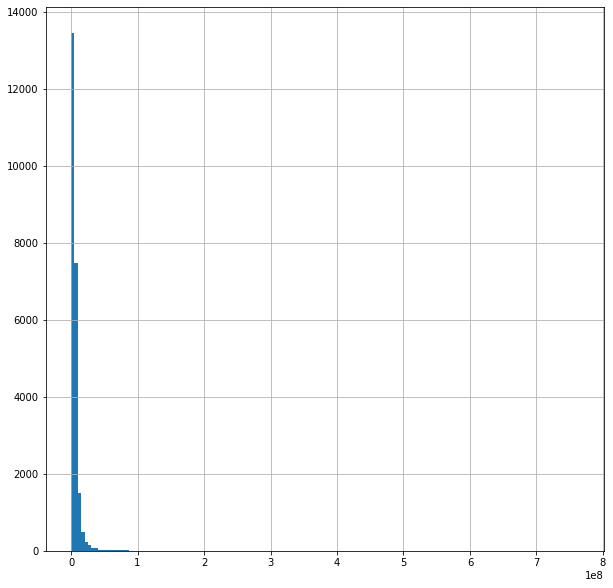

<AxesSubplot:>

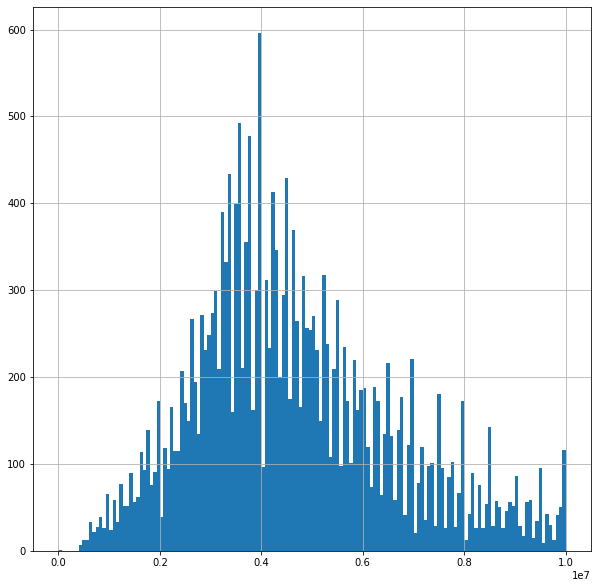

In [73]:
df['last_price'].hist(bins=150, figsize=(10, 10))
plt.show()
df['last_price'].hist(bins=150, figsize=(10, 10), range=(0,10000000))

Цены на квартиры разные и есть квартиры, стоимость которых значительно выше ожидаемых, но, основная их часть лежит в диапазоне 10 миллионов, а самый большой пик-всего около 4 миллионов.

<AxesSubplot:>

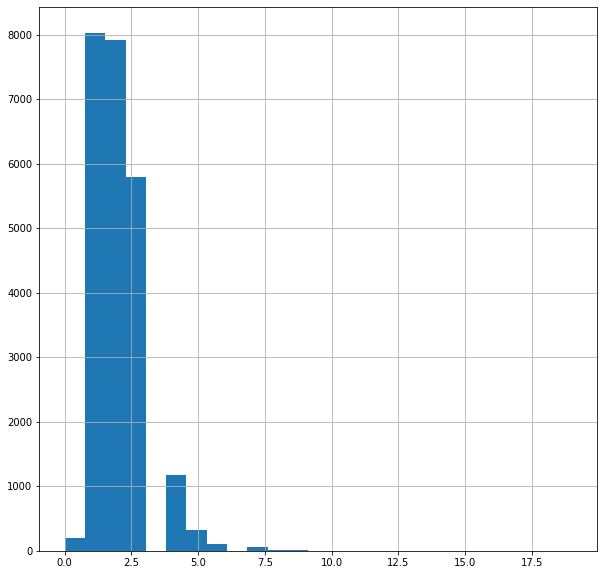

In [74]:
df['rooms'].hist(bins=25, figsize=(10, 10))

Чаще всего в Ленинградской области продают одно-, двух- и трехкомнатные квартиры.

<AxesSubplot:>

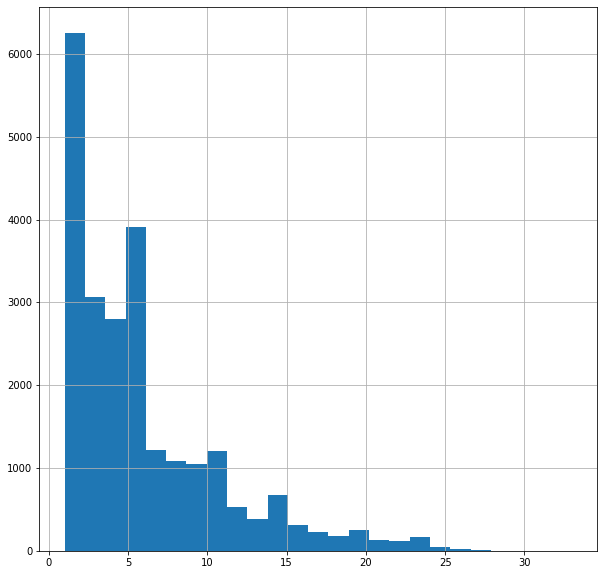

In [75]:
df['floor'].hist(bins=25, figsize=(10, 10))

В продаже квартиры, обычно, не выше 20 этажа (выше их уж совсем мало) - застройка в СпБ не самая высокая.

<AxesSubplot:>

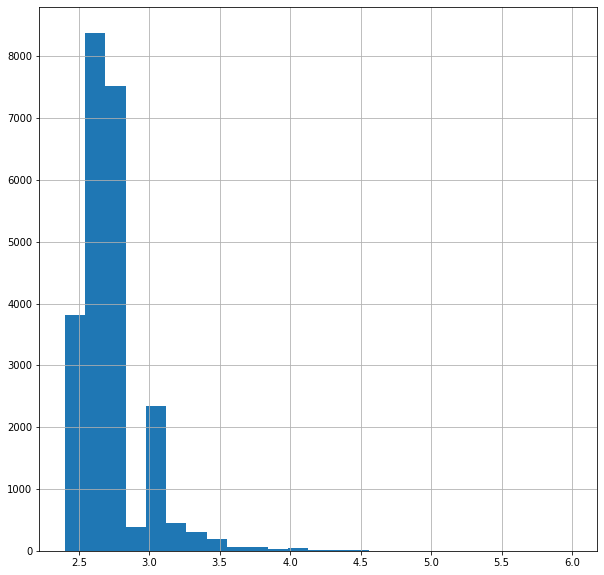

In [76]:
df['ceiling_height'].hist(bins=25, figsize=(10, 10))

И потолки достаточно типовые - в основном, до 3,5 м.

<AxesSubplot:>

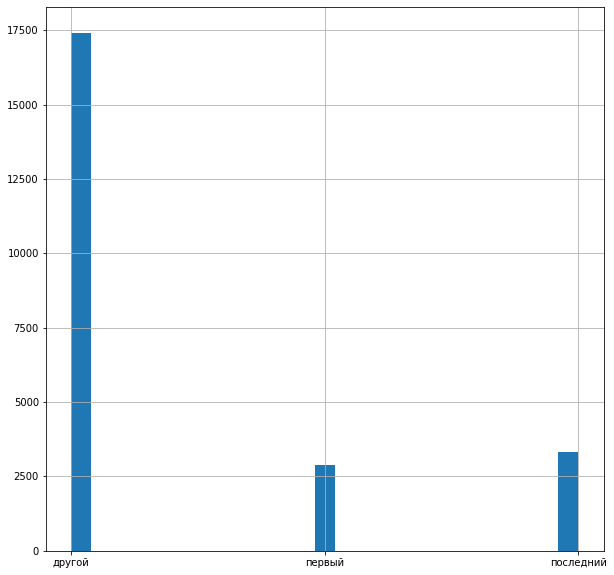

In [77]:
df['type_floor'].hist(bins=25, figsize=(10, 10))

Тут тоже все логично. Этажей, которые в доме не первые и не последние в доме обычно существенно больше.

<AxesSubplot:>

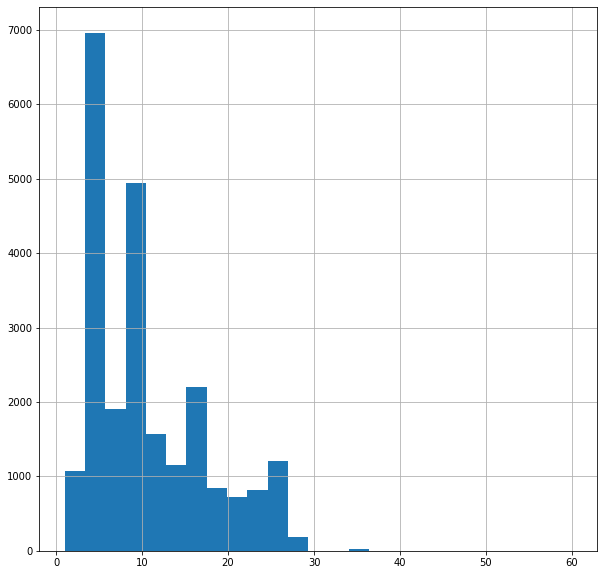

In [78]:
df['floors_total'].hist(bins=25, figsize=(10, 10))

Снова все логично. Типовая застройка. Мног старых пяти и девятиэтажек.

<AxesSubplot:>

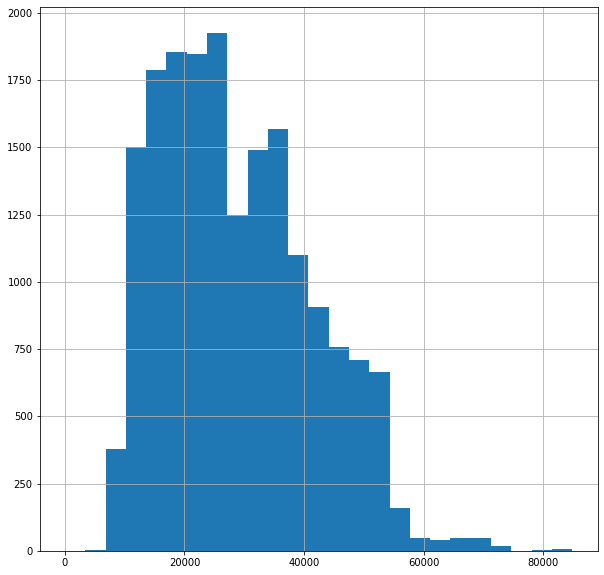

In [79]:
df['airports_nearest'].hist(bins=25, figsize=(10, 10))

Мало, кто хочетр жить ядом с аэропортом, близко к ним дома редко строят.

<AxesSubplot:>

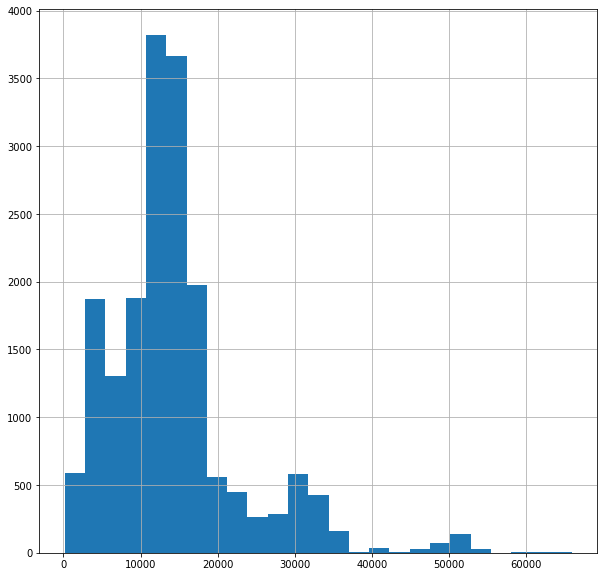

In [80]:
df['cityCenters_nearest'].hist(bins=25, figsize=(10, 10))

Сложно быть далеко от центра города, если города не большие)

<AxesSubplot:>

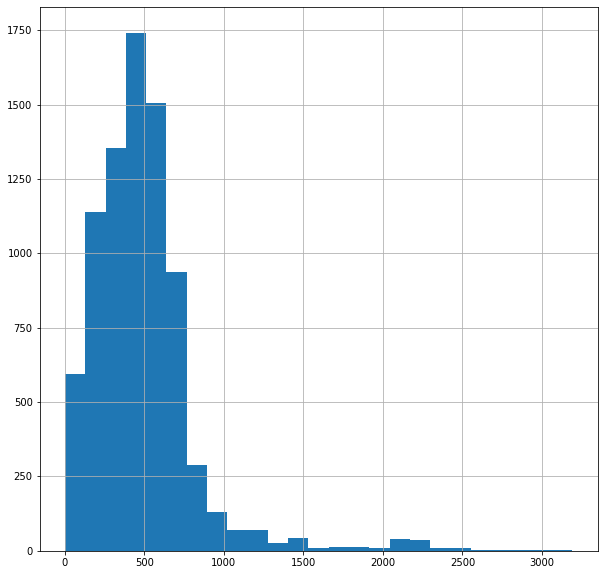

In [81]:
df['parks_nearest'].hist(bins=25, figsize=(10, 10))

Людям нужен кислород-парки недалеко от дома-это прекрасно. в основном, эти парки менее, чем на расстояниии километра.

<AxesSubplot:>

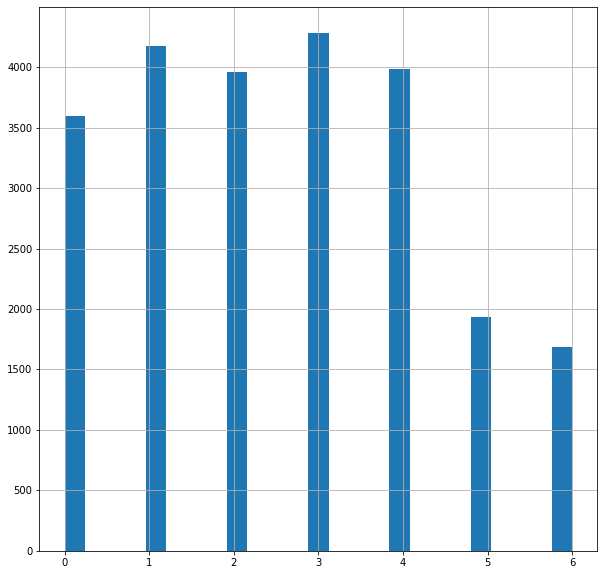

In [82]:
df['day'].hist(bins=25, figsize=(10, 10))

В будние дни объявления публикуют чаще.

<AxesSubplot:>

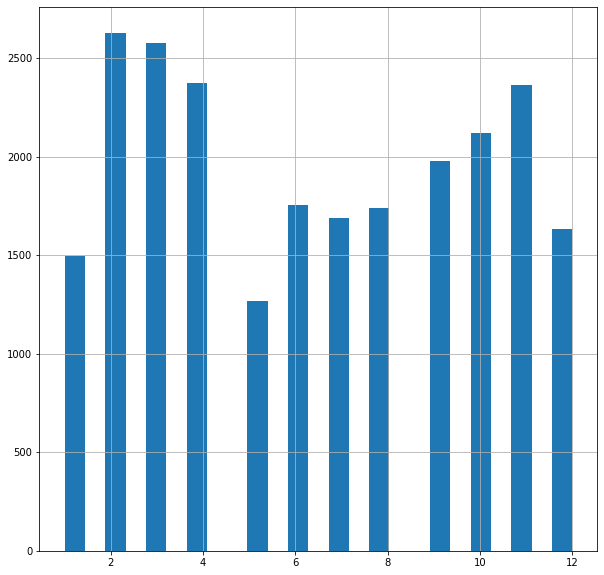

In [83]:
df['month'].hist(bins=25, figsize=(10, 10))

Существуют сезонные скачки продаж и затишье публикаций. Они связаны с отпусками и праздниками.

Решение по типу этажа есть ниже.

А last_price с методом range() есть выше, ты меня там даже похвалил)

Мной дважды был проведен анализ гистограмм на этапе предподготовки. Здесь дополнительно отмечу, что в рабочие дни объявления публикуют чаще, чем на выходных. В январе, с мая по август и в декабре наблюдается спад публикаций объявлений. В 2017 и 2018 году был "бум" публикаций объявлений.

Больше всего квартир продается в пределах 20 км от центра города (что обычно связано с размерами городов).

Так же стоит отметить, что чаще продают одно- и двухкомнатные квартиры.

#### Изучим, зависит ли цена от общей площади:

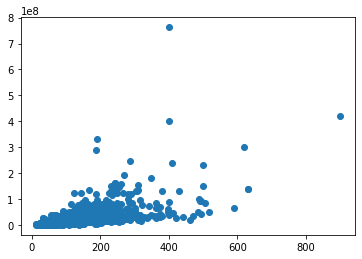

In [84]:
plt.scatter(df['total_area'], df['last_price'])

In [85]:
np.corrcoef(df['total_area'], df['last_price'])[0, 1]

0.6537055448083265

In [86]:
from scipy.stats.stats import pearsonr
pearsonr(df['total_area'], df['last_price'])

/tmp/ipykernel_694/1076904638.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.6537055448083262, pvalue=0.0)

Коэффициент корреляции составляет 0,65, что является положительной корреляцией. Двустороннее значение равно 0, поскольку оно меньше 0,05, можно заключить,  что существует статистически значимая корреляция между величинами.

Наблюдается зависимость цены от общей площади. С ростом площади, как правило, стоимость объекта недвижимости растет. Очевидно, что на стоимость влияет не только площадь, но и другие параметры, поэтому график не однородный.

Было написано "лучше", посчитала это не обязательным.

#### Изучим, зависит ли цена от жилой площади:

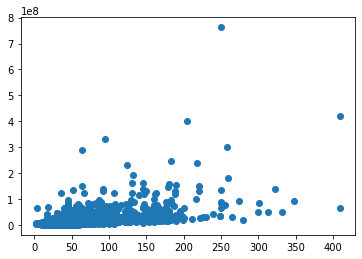

In [87]:
plt.scatter(df['living_area'], df['last_price'])

In [88]:
pearsonr(df['living_area'], df['last_price'])

PearsonRResult(statistic=0.5570884289906238, pvalue=0.0)

Коэффициент корреляции 0.55, двустороннее значение 0, следовательно влияние является значимым.

Аналогично, с ростом жилой площади растет и стоимость квартир.

#### Изучим, зависит ли цена от площади кухни:

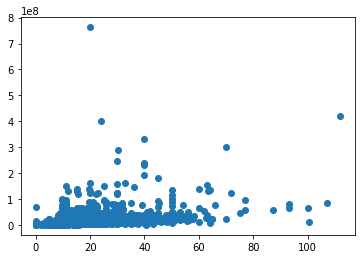

In [89]:
plt.scatter(df['kitchen_area'], df['last_price'])

In [90]:
pearsonr(df['kitchen_area'], df['last_price'])

PearsonRResult(statistic=0.45134103444678864, pvalue=0.0)

Аналогично, влияние является значимым.

С ростом площади кухни так же наблюдается рост стоимости квартир. Хотя так же наблюдаются неприлично высокие показатели стоимости квартир с небольшими кухнями

#### Проверим, как стоимость квартиры меняется от количества комнат в ней

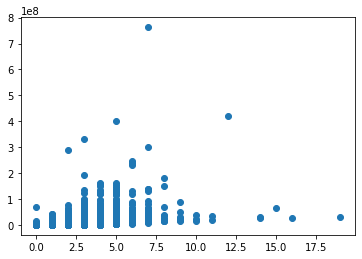

In [91]:
plt.scatter(df['rooms'], df['last_price'])

In [92]:
pearsonr(df['rooms'], df['last_price'])

PearsonRResult(statistic=0.36423856290471546, pvalue=0.0)

Аналогично, влияние является значимым.

Растет количество комнат-растет стоимость квартиры. Выглядит логично. Некоторые единичные значения из графиа выбиваются. но похоже на нормальное распределение)

#### Изучим, зависит ли цена от этажа:

<AxesSubplot:xlabel='type_floor'>

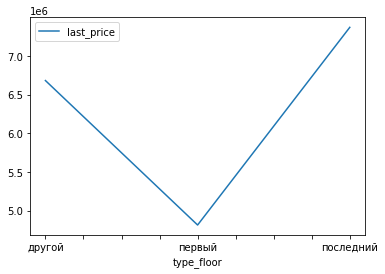

In [94]:
df_pivot_type_floor = df.pivot_table(index='type_floor', values='last_price')
df_pivot_type_floor.plot()

На первом этаже квартиры дешевле. Наверняка, прохожие в окназаглядывающие снижают желанность.

приму к сведению, сейчас для сдачи это не критичное замечание, поэтому я проверю после сдачи проекта

#### Изучим, зависит ли цена от даты размещения:

<AxesSubplot:xlabel='day'>

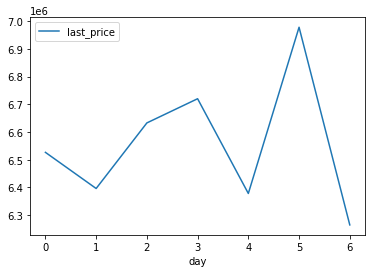

In [96]:
df_pivot_day = df.pivot_table(index='day', values='last_price')
df_pivot_day.plot()

<AxesSubplot:xlabel='month'>

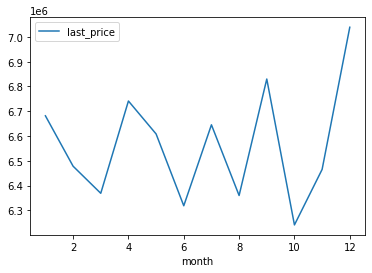

In [97]:
df_pivot_month = df.pivot_table(index='month', values='last_price')
df_pivot_month.plot()

<AxesSubplot:xlabel='year'>

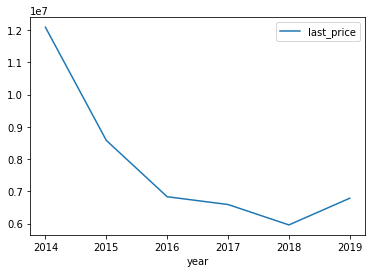

In [98]:
df_pivot_year = df.pivot_table(index='year', values='last_price')
df_pivot_year.plot()

Очень интересно) Выложенное в субботу объявление дает + к стоимости квартиры при продаже) А по месяцам стоимость квартир скачет так, что в октябре оказывается минимальной. Наверное, люди хотят заключить сделку до нового года, потому и готовы снизить стоимость (зато в декабре у продавцов весь год впереди и цену можно ставить повыше). А по годом стоимость недвижимости идет на спад, в 2018, видимо, отталкивается от дна и снова идет на повышение.

#### Средняя стоимость квадратного метра по локации объекта

**Построим сводную таблицу:**

In [99]:
pivot_price = df.pivot_table(index='locality_name', values='price_for_metr').sort_values(by='price_for_metr')

Выведем 10 первых и 10 последних строк:

In [100]:
pivot_price.head(10)

,price_for_metr
locality_name,
Старополье,11206.22
станции Свирь,11481.48
Вахнова Кара,11688.31
Выскатка,12335.48
Совхозный,12629.13
Малая Романовка,12724.55
Тесово-4,12931.03
Сижно,13709.68
Ям-Тесово,13711.55


In [101]:
pivot_price.tail(11)

,price_for_metr
locality_name,
Парголово,90175.91
Не указано,94309.99
Кудрово,95326.18
Левашово,96997.69
Мистолово,98549.98
Лисий Нос,100660.81
Сестрорецк,101757.62
Пушкин,103125.82
Репино,104238.61


Ниже всего стоимость за метр в Старополье, станции Свирь, Вахнова Кара, Выскатка, Совхозный, Малая РомановкаБ Тесово-4, Сижно, м-Тесово, Житково. Это все - поселки и деревни ЛО, все логично - чем выше расстояние от крупных городов, тем ниже цена.

Самый дорогой средний квадратный метр недвижимости в Зеленогорске, что удивляет и впечатляет - на 1 месте я ожидала увидеть СпБ. В первую десятку так же попали квартиры, местонахождение которых мы не выяснили, но можно сказать, что в среднем, оно где-то от Парголово до Кудрово - вероятнее всего, как и средняя цена, они распределены где-то среди первых)

#### Найдем топ-10 городов с самым большим количеством объявлений:

In [102]:
df_group = df.groupby('locality_name').agg({'total_images':'count', 'price_for_metr':'median'})
df_group.sort_values(by='total_images', ascending=False)[0:10]

,total_images,price_for_metr
locality_name,,
Санкт-Петербург,15684,104782.48
Мурино,589,86119.40
Кудрово,471,95762.71
Шушары,440,76876.17
Всеволожск,395,65789.47
Пушкин,369,100000.00
Колпино,338,74723.75
Парголово,327,91642.86
Гатчина,306,67860.57


Самый дорогой средний квадратный метр недвижимости среди топ-10 локаций по количеству объявлений в Санкт-Петербурге, а Пушкин на 2 месте по стоимости квадратного метра и на 6 по количеству объявлений.

#### Квартиры в СпБ  и их цена в зависимости от удаленности от центра города

In [103]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metr,day,month,year,type_floor,cityCenters
0,20,13000000.00,108.00,2019-03-07,3.00,2.70,16,51.00,8.00,False,...,482.00,2.00,755.00,NaN,120370.37,3,3,2019,другой,16.00
1,7,3350000.00,40.40,2018-12-04,1.00,2.75,11,18.60,1.00,False,...,NaN,0.00,NaN,81.00,82920.79,1,12,2018,первый,19.00
2,10,5196000.00,56.00,2015-08-20,2.00,2.55,5,34.30,4.00,False,...,90.00,2.00,574.00,558.00,92785.71,3,8,2015,другой,14.00
3,0,64900000.00,159.00,2015-07-24,3.00,2.60,14,45.00,9.00,False,...,84.00,3.00,234.00,424.00,408176.10,4,7,2015,другой,7.00
4,2,10000000.00,100.00,2018-06-19,2.00,3.03,14,32.00,13.00,False,...,112.00,1.00,48.00,121.00,100000.00,1,6,2018,другой,8.00


In [104]:
pivot_spb_price = df[df['locality_name'] == 'Санкт-Петербург'].pivot_table(index='cityCenters', values='price_for_metr')

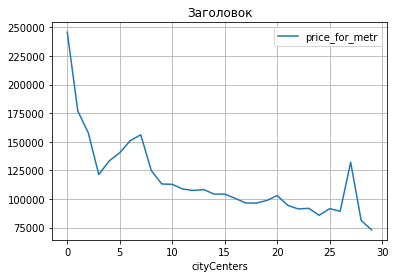

In [105]:
pivot_spb_price.plot(grid = True, title = 'Заголовок');

И построим подобный график по всем значениям (а не только средним):

<AxesSubplot:xlabel='cityCenters'>

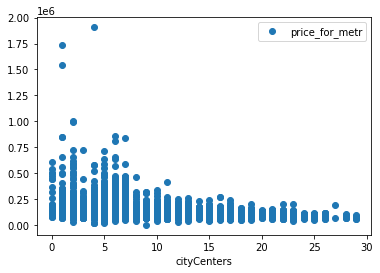

In [106]:
df[df['locality_name'] == 'Санкт-Петербург'].plot(x='cityCenters', y='price_for_metr', style='o', )

По графику видно, что самый дорогой квадратный метр недвижимости в СпБ - в центре (и самые дорогие квартиры, действительно, в пределах 5 км от центра). На 3 км наблюдается спад стоимости (которым точно можно воспользоваться, если планируется покупка недвижимости в СпБ), а с 7 км стоимость практически равномерно падает. Причем, минимальные стоимости квадратного метра на любом расстоянии от центра практически одинаковы.
Можно смело говорить, что чем дальше хорошая квартира от ценра, тем ниже будет ее цена при прочих равных условиях.

### Общий вывод

#### *
В ходе работы был изучен датасет с информацией с сайта купли-продажи недвижимости. Были обнаружены пропуски в данных:
ceiling_height           (высота потолков),
floors_total             (количество этажей в доме),
living_area              (жилая площадь в квадратных метрах),
is_apartment             (апартаменты (булев тип)),
kitchen_area             (площадь кухни в квадратных метрах),
balcony                  (число балконов),
locality_name            (название населенного пункта),
airports_nearest         (расстояние до ближайшего аэропорта),
cityCenters_nearest      (расстояние до центра города),
parks_around3000         (парки в радиусе 3 км),
parks_nearest            (расстояние до ближайшего парка в м),
ponds_around3000         (водоемы в радиусе 3 км),
ponds_nearest            (расстояние до ближайшего водоема в м),
days_exposition          (сколько дней было размещено объявление (от публикации до снятия)).



#### *
Пропуски в столбце ceiling_height были заполнены медианными по количеству этажей в доме, cтолбец 'is_apartment' хранит булево значение, поэтому отсутствие значения в нем заполнены 0, в столбце 'balcony' отсутствующие значения, скорее всего, говорят об отсутствии балконов в данных объектах недвижимости и пропуски были заменены на 0, пропущеннные значения в столбце 'floors_total'были заполненны медианными по этому столбцу, жилая площадь коррелируется с общей площадью квартир и с количеством в ней комнат, поэтому пропущенные значения в столбце 'living_area' заменили на медианные значения по группам. Аналогично поступили со значениями в столбце 'kitchen_area'.Пропущенные данные в столбце locality_name заменим на 'Не указано'. Пропущенные значения в столбце 'ceiling_height' заменили медианными в зависимости от общего количества этажей в доме.


В столбцах 'days_exposition', airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000 и ponds_nearest были оставлены пропуски. На мой взгляд,  заполнение пропусков искусственно не отразит реальной статистике и, в дальнейшем, помешает обучению модели.

#### *
Было выявлено, что в таблице присутствуют данные о квартирах, в которых жилая площадь превышает общую, а так же сумма жилой площади и кухни превышает кухонную. Для обучения модели такие строки не подойдут и рекомендуется почистить датасет дополнительно.

В некоторых столбцах были найдены выбивающиеся значения - например, высота потолков. Данные были проанализированы и заменены.

#### * 
В ходе анализа было выявлено:

Самый дорогой средний квадратный метр недвижимости среди топ-10 локаций по количеству объявлений в Санкт-Петербурге, а Пушкино на 2 месте.

В среднем, квартиры в СпБ и Ленинградской области продаются за 180 дней (почти полгода), половина из них-за 95 дней. Самая быстрая скорость продажи - 1 день, а некоторорые ждут заключения сделки 1580 дней (больше 4 лет), но они, видимо, верят в поговорку, согласно которой на любой товар есть свой купец) Правда, есть здесь подозрения, что квартиры эти и не продают, а только риелторы звонки принимают.
Быстрыми продажами можно назвать продажи в срок до 45 дней влючительно. В этот срок продается 25% квартир.

Самый дорогой средний квадратный метр недвижимости среди топ-10 локаций по количеству объявлений в Санкт-Петербурге, а Пушкино на 2 месте.

Чаще всего объявления выкладывают с понедельника по пятницу, а субботние квартиры продаются дороже. Спад в продажах наблюдается в январе, с мая по август и в декабре. В 2017 и 2018 году был "бум" публикаций объявлений.

Чаще всего, продаются одно- и двухкомнатные квартиры. Квартир с количеством комнат более 3 - очень мало на рынке.

Стоимость квартиры прямо зависит от их общей, жилой и площади кухни, удаленности от центра города и городов вообще (вспомним деревни и поселки с самыми дешевыми квартирами). На первом этаже квартира будет дешевле, а на последнем дороже, чем на остальных.